In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

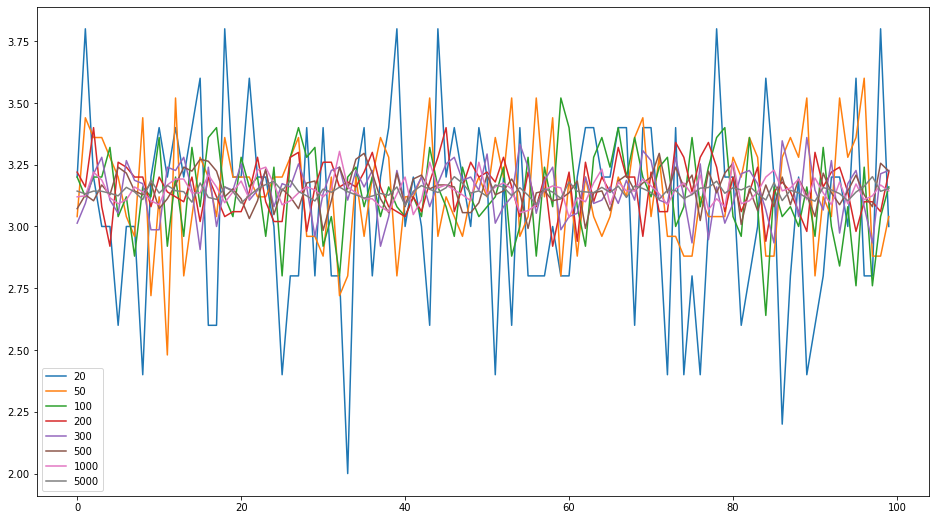

   sample_count      mean       std
0            20  3.064000  0.383541
1            50  3.138400  0.213423
2           100  3.135200  0.167884
3           200  3.154400  0.104425
4           300  3.145200  0.104254
5           500  3.149280  0.069312
6          1000  3.144520  0.050214
7          5000  3.141856  0.023694


In [2]:
# ex1

def calculate_pi(n: int):
    circle_count = 0
    
    for i in range(n):
        x = random.random()
        y = random.random()
        len_r = np.sqrt(np.power(x, 2) + np.power(y, 2))
        if len_r <= 1:
            circle_count += 1
            
    pi = circle_count * 4 / n
    return pi

def ex1():
    samples_list = [20, 50, 100, 200, 300, 500, 1000, 5000]
    categories = [str(x) for x in samples_list]
    epochs = 100
    result_dict = {}
    plt.figure(figsize=(16, 9))
    for index, n in enumerate(samples_list):
        result_list = []
        for c in range(epochs):
            result_list.append(calculate_pi(n))
        result_dict[categories[index]] = result_list
        plt.plot(range(epochs), result_list)
    
    plt.legend(categories)
    plt.show()
    
    mean_list = [np.mean(v) for k, v in result_dict.items()]
    std_list = [np.std(v) for k, v in result_dict.items()]
    table = pd.DataFrame({'sample_count': samples_list, 'mean': mean_list, 'std': std_list})
    print(table)
    
ex1()

In [33]:
# ex2

def canMoveTo(x: int, y: int, grid: np.array):
    result = True
    mid = (grid.shape[0] // 2, grid.shape[0] // 2)
    if (x, y) == mid:
        if grid[(x, y)] >= 2:
            result = False
    else:
        if grid[(x, y)] >= 1:
            result = False
    return result


def moveInGridSize(size: int):
    assert size > 0
    mid = (size // 2, size // 2)
    
    grid = np.zeros((size, size), dtype=np.int32)
    current = (0, 0)
    grid[current] = 1
    path = [current]
    
    fail_count = 0
    
    while True:
        p = random.random()
        
        x = current[0]
        y = current[1]
        if current == (0, 0):
            if not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y + 1, grid):
                # 绝路
                grid = np.zeros((size, size), dtype=np.int32)
                current = (0, 0)
                grid[current] = 1
                path = [current]
                fail_count += 1
                continue
            else:
                if p < 0.5:
                    x += 1 # 纵走
                else: 
                    y += 1 # 横走

            
        elif current == (0, size - 1):
            if not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y - 1, grid):
                # 绝路
                grid = np.zeros((size, size), dtype=np.int32)
                current = (0, 0)
                grid[current] = 1
                path = [current]
                fail_count += 1
                continue
            else:                
                if p < 0.5: 
                    x += 1
                else:
                    y -= 1
        elif current == (size - 1, 0):
            if not canMoveTo(x - 1, y, grid) and not canMoveTo(x, y + 1, grid):
                # 绝路
                grid = np.zeros((size, size), dtype=np.int32)
                current = (0, 0)
                grid[current] = 1
                path = [current]
                fail_count += 1
                continue
            else:
                if p < 0.5:
                    x -= 1
                else:
                    y += 1
        elif current == (size - 1, size - 1):
                # 到达，结束！
                print('Finish!')
                break
        else:
            if x == 0:
                if not canMoveTo(x, y - 1, grid) and not canMoveTo(x, y + 1, grid) and not canMoveTo(x + 1, y, grid):
                    # 绝路
                    grid = np.zeros((size, size), dtype=np.int32)
                    current = (0, 0)
                    grid[current] = 1
                    path = [current]
                    fail_count += 1
                    continue
                else:
                    if p < 0.3333:
                        y -=1
                    elif 0.3333 <= p < 0.6667:
                        y += 1
                    else:
                        x += 1
            elif x == size - 1:
                if not canMoveTo(x, y - 1, grid) and not canMoveTo(x, y + 1, grid) and not canMoveTo(x - 1, y, grid):
                    # 绝路
                    grid = np.zeros((size, size), dtype=np.int32)
                    current = (0, 0)
                    grid[current] = 1
                    path = [current]
                    fail_count += 1
                    continue
                else:
                    if p < 0.3333:
                        y -=1
                    elif 0.3333 <= p < 0.6667:
                        y += 1
                    else:
                        x -= 1
            elif y == 0:
                if not canMoveTo(x - 1, y, grid) and not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y + 1, grid):
                    # 绝路
                    grid = np.zeros((size, size), dtype=np.int32)
                    current = (0, 0)
                    grid[current] = 1
                    path = [current]
                    fail_count += 1
                    continue
                else:
                    if p < 0.3333:
                        x -=1
                    elif 0.3333 <= p < 0.6667:
                        x += 1
                    else:
                        y += 1
            elif y == size - 1:
                if not canMoveTo(x - 1, y, grid) and not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y - 1, grid):
                    # 绝路
                    grid = np.zeros((size, size), dtype=np.int32)
                    current = (0, 0)
                    grid[current] = 1
                    path = [current]
                    fail_count += 1
                    continue
                else:
                    if p < 0.3333:
                        x -=1
                    elif 0.3333 <= p < 0.6667:
                        x += 1
                    else:
                        y -= 1
            else:
                if not canMoveTo(x - 1, y, grid) and not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y - 1, grid) and not canMoveTo(x, y + 1, grid):
                    # 绝路
                    grid = np.zeros((size, size), dtype=np.int32)
                    current = (0, 0)
                    grid[current] = 1
                    path = [current]
                    fail_count += 1
                    continue
                else:
                    if p < 0.25:
                        x -= 1
                    elif 0.25 <= p < 0.5:
                        x += 1
                    elif 0.5 <= p < 0.75:
                        y -= 1
                    else:
                        y += 1
        
        if canMoveTo(x, y, grid):            
            path.append((x, y))
            current = (x, y)
            grid[current] += 1
    
    print('grid: \n', grid)
    print('path: ', path)
    print('try cont: ', fail_count)

In [34]:
moveInGridSize(7)

Finish!
grid: 
 [[1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [1 1 0 0 1 1 0]
 [1 1 1 1 1 1 1]]
path:  [(0, 0), (1, 0), (1, 1), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (5, 1), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (5, 4), (5, 5), (6, 5), (6, 6)]
try cont:  0


In [27]:
current = (0, 1)
x1 = current[0]
y1 = current[1]
y1 += 5

current

(0, 1)

In [28]:
y1

6